In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


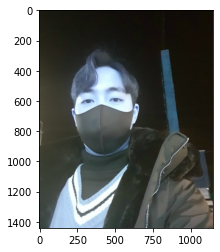

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/원규사진123.png'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

#먼저 저장된 이미지 파일을 불러와보면 파란색으로 되어있다
#3번째 줄을 보면 img_bgr로 되어 있는데 이는 opencv의 특징으로서 붉은색을 푸른색, 푸른색을 붉은색으로 바꿔서 출력된 것이다.

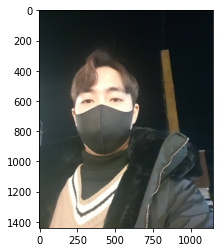

In [3]:
 img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#그래서 위의 이미지를 다시 원래의 색으로 바꾸기 위해 맨 위의 명령어를 사용한다.
#BGR2RGB는 결국 BGR->RGB로 바꾼다는 것이다.
#그렇게 해서 원래 색상의 사진이 밑에 나온다.

In [4]:
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

#이번 노드의 핵심은 스티커 사진이다. 그러므로 얼굴의 위치를 찾아야 하는데 이 영역을 찾기 위해
#detector를 사용한다.

🌫🛸


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # (image, num of image pyramid)
print("🌫🛸")

#먼저 원래 기존의 사진을 불러오면 파란색 괴물이 되기 때문에 다시 rgb로 바꾸는 작업을 해주고,
#두번째 이미지 피라미드를 이용해서 이미지의 크기를 키운다.

🌫🛸


rectangles[[(194, 451) (656, 913)]]


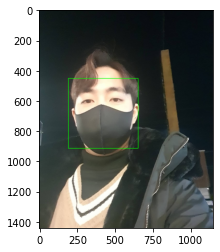

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#dlib_rect는 dlib.rectangles 즉 사각박스 안의 객체를 반환한다.
#dlib.rectangles이거는 left(), top(), right(), bottom(), height(), width()의 맴버 함수를 포함하고 있는데 그냥 생각해보면 네모난 박스가
#가지고 있는 성질들이라고 생각하면 편한거 같다.
#그래서 진행을 체크해 보면 밑의 사진 속 내 얼굴에 초록색 사각형이 생성된 것을 확인할 수 있다.
    

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

#이제 사진 속 얼굴 영역까지 했으면 그 다음으로 해야 할 작업은 얼굴의 특징들을 표현하는 것이다.
#쉽게 생각하면 얼굴의 코, 눈, 입, 턱, 눈썹 등 두드러지는 이목구비의 위치를 알아야 사진 스티커를 원하는 위치에
#붙일 수 있게 된다.

🌫🛸


In [8]:
list_landmarks = []


for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 얼굴 영역 박스 마다 face landmark를 찾아낸다.
# 얼굴 특정 부분에 랜드마크의 갯수가 얼만큼 나오는지 밑에 결과값으로 나오게 된다.

68


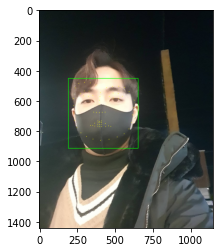

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#생성된 랜드마크를 이미지에 넣어보자.
#이미지를 그냥 가져오지말고 꼭 색을 변경해서 원래의 색이 나오게 한 후 랜드마크 점을 넣으면
#짜잔 내 얼굴에 노란색 점이 생겼다(작게 나오니까 자세히 봐야된다.)

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

    #랜드마크를 얼굴에 붙여서 했다.
    #그 다음 해야할 것은 이제 위치 좌표를 알아야 한다.(좌표를 알아야 스티커를 그 좌표에 넣어 자연스럽게 나오지)
    #랜드마크 점마다 번호가 있는데 일단 코 점의 번호는 30번이다.
    #그리고 내 얼굴의 중앙좌표를 확인해 보면 밑의 좌표가 찍힌다.

(397, 622)
(x,y) : (397,391)
(w,h) : (463,463)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/24674.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#고양이 수염을 가져온다.
#그런데 그냥 가져오는게 아니라 위에 사진의 크기를 알아봤으니 그 크기에 맞게 가져와진다. 

(463, 463, 3)


In [12]:
refined_x = (x - w // 2)+15
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#맨 처음 스티커를 가져오면 이렇게 되는데 결과값을 보면 -가 되어있다.
#이거 사진으로 출력해보면 스티커가 짤린다.

(x,y) : (181,-72)


In [13]:
if refined_x  < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 540

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#그래서 위에 -나온 값을 양수로 바꿔주기 위해 위에 y를 0 초과로 하게 되고 값을 설정해서
#내 얼굴에 알맞는 위치가 나올 수 있게 값을 설정해 준다.

(x,y) : (181,540)


In [14]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")
# 여기서 스티커 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용한다고 했는데, 이거 고양이 수염을 그냥 가져오면
# 배경이 하얀색이여서 내 얼굴을 가리게 된다. 그러므로 저기 마지막 바로 윗부분에 img_sticker이 부분이 원래는 0이였지만
# 이것을 255로 바꾸게 되면 배경이 투명색이 되어 적절하게 사용이 된다.

슝~


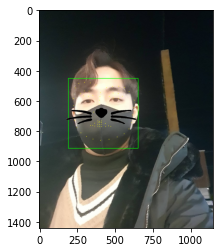

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 그래서 위에 결과들을 도출해서 나온 사진이 바로 밑에 나온 사진이다.
# 그런데 사각형 박스하고 랜드마크 점들이 아직도 남아있네...

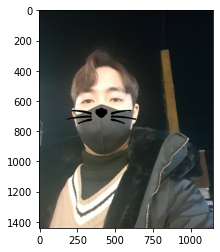

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))부분 바로 위에 명령어들을 사용해서 박스와 랜드마크 점들을 제거해 주고
#이미지 색상을 바꿔서 출력해 주면 밑에 스티커가 붙여진 깔끔한 사진을 결과로 얻을 수 있다.